### Data Import using yfinance

#### Installing the yfinance package.

In [732]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


#### Importing all the required python packages

In [733]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import matplotlib.pyplot as plt
import os

#### Downloading the data for PayPal stock. 

In [734]:
initial_data = yf.download("PYPL", start="2020-03-01", end="2021-03-02")

[*********************100%***********************]  1 of 1 completed


In [735]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,107.459999,113.050003,106.529999,112.860001,112.860001,13367000
2020-03-03,112.820000,114.559998,108.260002,109.760002,109.760002,11912300
2020-03-04,112.040001,115.389999,110.620003,115.300003,115.300003,8245200
2020-03-05,112.029999,114.900002,111.239998,112.180000,112.180000,7671500
2020-03-06,107.949997,111.570000,107.580002,110.889999,110.889999,8524300


In [736]:
initial_data['Adj Close'].head()

Date
2020-03-02    112.860001
2020-03-03    109.760002
2020-03-04    115.300003
2020-03-05    112.180000
2020-03-06    110.889999
Name: Adj Close, dtype: float64

#### Setting the Adj Closed data as a new DataFrame.

In [737]:
data1 =  initial_data['Adj Close'] 
data = pd.DataFrame(data1).dropna()

In [738]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-02 to 2021-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [739]:
data.head()

,Adj Close
Date,
2020-03-02,112.860001
2020-03-03,109.760002
2020-03-04,115.300003
2020-03-05,112.180000
2020-03-06,110.889999


In [740]:
data.tail()

,Adj Close
Date,
2021-02-23,265.000000
2021-02-24,266.070007
2021-02-25,253.940002
2021-02-26,259.850006
2021-03-01,273.630005


#### Plot for the movement of the stock

array([<AxesSubplot:xlabel='Date'>], dtype=object)

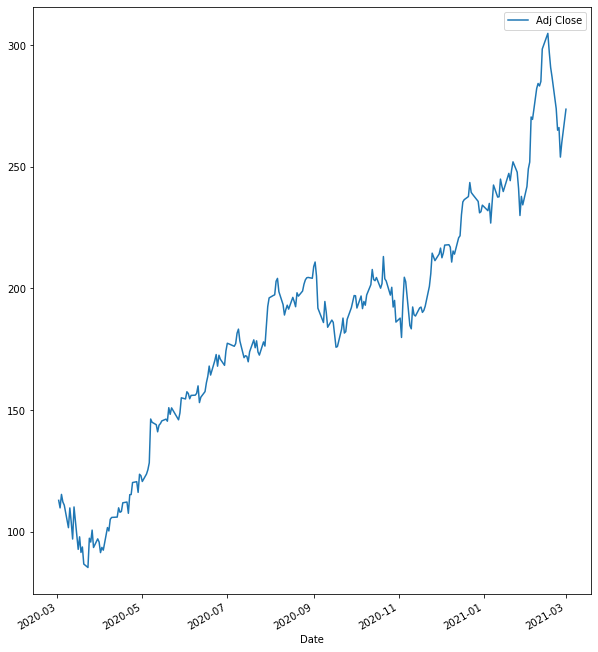

In [741]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [742]:
data.describe().round(2)

,Adj Close
count,252.00
mean,183.63
std,49.40
min,85.26
25%,154.16
50%,190.10
75%,211.68
max,304.79


#### Finding absolute differences to calculate the changes in a time series over time.

In [743]:
data.diff().head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-3.099998
2020-03-04,5.540001
2020-03-05,-3.120003
2020-03-06,-1.290001


In [744]:
data.diff().describe().round(2)

,Adj Close
count,251.00
mean,0.64
std,5.48
min,-18.01
25%,-2.78
50%,0.77
75%,3.96
max,18.53


#### Calculating the percentage change 

In [745]:
data.pct_change().round(4).head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0275
2020-03-04,0.0505
2020-03-05,-0.0271
2020-03-06,-0.0115


#### Calculating log returns

In [746]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0279
2020-03-04,0.0492
2020-03-05,-0.0274
2020-03-06,-0.0116


#### Plot for log returns

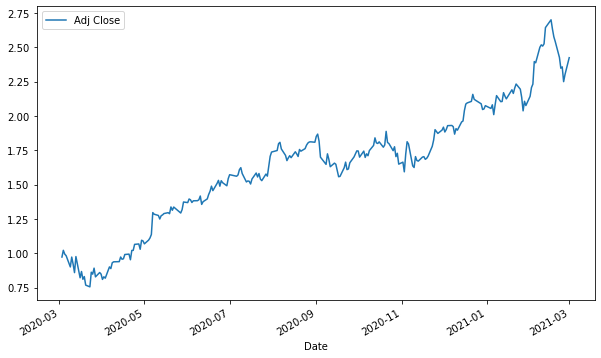

In [747]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

#### Resampling to 1 week

In [748]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2020-03-08,110.889999
2020-03-15,110.150002
2020-03-22,86.680000
2020-03-29,93.480003
2020-04-05,92.389999


#### Plot for 1 week resampled data

<AxesSubplot:xlabel='Date'>

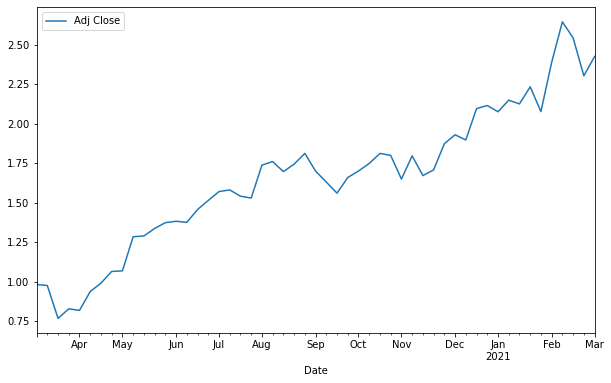

In [749]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

#### Resampling to 1 month


In [750]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2020-03-31,95.739998
2020-04-30,123.000000
2020-05-31,155.009995
2020-06-30,174.229996
2020-07-31,196.070007


#### Plot for 1 month resampled data

<AxesSubplot:xlabel='Date'>

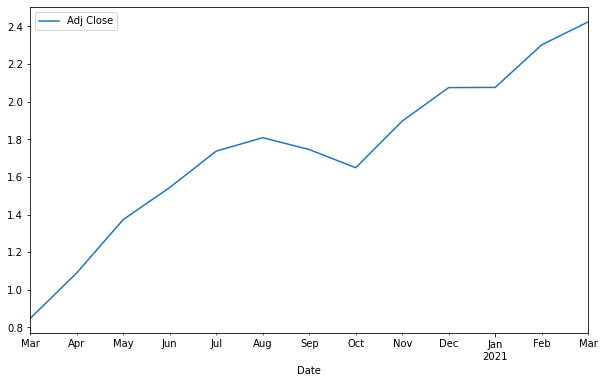

In [751]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

#### Calculating normal return

In [752]:

normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.027467645377956526,
 0.0504737682917615,
 -0.027059866990475894,
 -0.011499384132804512,
 -0.083506197016851]

#### Calculating log return

In [753]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.027851934508719454,
 0.04924127030267453,
 -0.027432726942388044,
 -0.011566013339595288,
 -0.08719997333664034]

#### Calculating annualized normal return and its annualized volatility

In [754]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 1.03309586 and its annulized volatility is 0.54261332


#### Calculating annualized log return and its annualized volatility

In [755]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.88562873 and its annulized volatility is 0.54045044


In [756]:
last_six_mnths= normal_return[:-125]


#### Calculating annualized normal return and its annualized volatility for last six months

In [757]:
dfnr_six_mnths = pd.DataFrame(last_six_mnths, columns = ['normal_six']) 
nr_six = dfnr_six_mnths.mean() * len(dfnr)
nv_six = dfnr_six_mnths.std() * (len(dfnr) ** 0.5)
print('The annulized normal return for six months is %.8f and its annulized volatility for six months is %.8f' % (nr_six,nv_six))

The annulized normal return for six months is 1.37867609 and its annulized volatility for six months is 0.62419499


In [758]:
log_last_six_mnths= log_return[:-125]

#### Calculating annualized log return and its annualized volatility for last six months

In [759]:
dflr_six_mnths_log = pd.DataFrame(log_last_six_mnths, columns = ['log']) 
lr_six = dflr_six_mnths_log.mean() * len(dflr)
lv_six = dflr_six_mnths_log.std() * (len(dflr) ** 0.5)
print('The annulized log return for last six months is %.8f and its annulized volatility for last six months is %.8f' % (lr_six,lv_six))

The annulized log return for last six months is 1.18392722 and its annulized volatility for last six months is 0.62079146


### Data Input

In [760]:
S0 = 241.03             # spot stock price 
E = 236.0               # strike price
T = 4/52                # time to maturity 
r = 0.0163              # risk free rate  
vol = 0.54261332        # volatility
N = 5                   # number of periods or number of time steps  
payoff = "put"          # payoff 

###  Binomial price tree

In [761]:
dT = float(T) / N                             # Delta t
u = np.exp(vol * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [762]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [763]:
S

array([[241.03      , 257.81036782, 275.75897504, 294.95715381,
        315.49189857, 337.45626027],
       [  0.        , 225.34183319, 241.03      , 257.81036782,
        275.75897504, 294.95715381],
       [  0.        ,   0.        , 210.67477819, 225.34183319,
        241.03      , 257.81036782],
       [  0.        ,   0.        ,   0.        , 196.96237284,
        210.67477819, 225.34183319],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        184.14248088, 196.96237284],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 172.15701037]])

In [764]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4850424411346446

#### Finding option value at each final node

In [765]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
V[:,-1] = (E-S_T> 0.0)
V

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

#### Finding option value at earlier nodes

In [766]:
# for Binary Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.52736704, 0.33492896, 0.13645441, 0.        , 0.        ,
        0.        ],
       [0.        , 0.70888278, 0.52203677, 0.26504832, 0.        ,
        0.        ],
       [0.        , 0.        , 0.88521971, 0.76435038, 0.51482844,
        0.        ],
       [0.        , 0.        , 0.        , 0.99949859, 0.99974926,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99974926,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [767]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.5273670433415347


## Monte Carlo Simulation

In [768]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [769]:
T = 4/52
r = 0.0163
vol = 0.54261332
S0 = 241.03
E = 236

In [770]:
S = mcs_simulation_np(7000)

In [771]:
S = np.transpose(S)
S

array([[241.03      , 241.08341515, 241.08128468, ..., 209.68751974,
        209.12482663, 209.22808883],
       [241.03      , 241.5551637 , 241.6816304 , ..., 329.58998902,
        330.56049719, 331.97399483],
       [241.03      , 241.34982611, 241.10524956, ..., 274.50805984,
        274.6989262 , 275.1507334 ],
       ...,
       [241.03      , 241.20998698, 240.75060722, ..., 208.07020233,
        207.71706431, 208.17175582],
       [241.03      , 241.13508524, 241.45442325, ..., 213.99373695,
        213.87093045, 213.53424361],
       [241.03      , 241.21335686, 241.62950336, ..., 280.93454947,
        280.38627161, 280.75441378]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

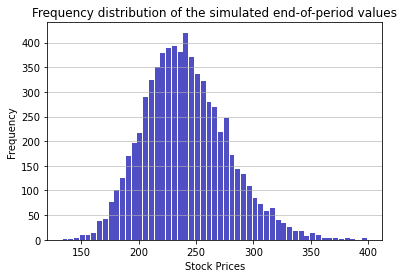

In [772]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Stock Prices')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [773]:
p = np.mean(np.where(E > S[:,-1],1,0))
print('Binary put', str(p))

Binary put 0.471


### Greeks

#### 1. Delta

In [774]:
def delta(S, E, T, r, vol):
    
    d2 = (np.log(S / E) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = -(np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/ (vol * S * np.sqrt(T)))
    
    return delta

In [775]:
delta(241.03, 236, 4/52, 0.0163,0.54261332)

-0.010954977017688992

In [776]:
S = np.linspace(100,400,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 236, 4/52, 0.0163,0.54261332)

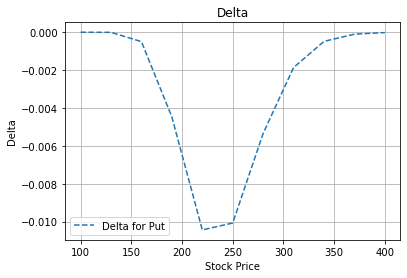

In [777]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

#### 2. Gamma

In [778]:
def gamma(S, E, T, r, vol):
    
    d1 = (np.log(S / E) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / E) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2) * (S ** 2) * T)
    
    return gamma

In [779]:
gamma(241.03, 236, 4/52, 0.0163,0.54261332)

6.756403981437047e-05

In [780]:
S = np.linspace(50,400,20)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],236, 4/52, 0.0163,0.54261332)

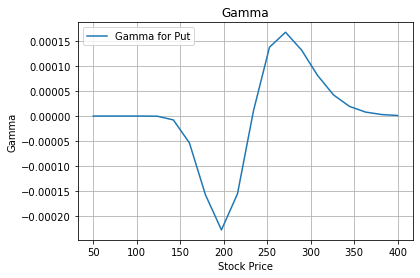

In [781]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

#### 3. Theta

In [782]:
def theta(S, E, T, r, vol):
    d1 = (np.log(S / E) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / E) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    theta_put =(r*np.exp(-r*T)*(1-si.norm.cdf(d2,0.0,1.0))-np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)*((d1/2*T)-(r/(vol*np.sqrt(T)))))
    return theta_put

In [783]:
theta(241.03, 236, 4/52, 0.0163,0.54261332)

0.04728528578745891

In [784]:
T = np.linspace(0.15,0.01,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(241.03, 236, T[i], 0.0163,0.54261332)

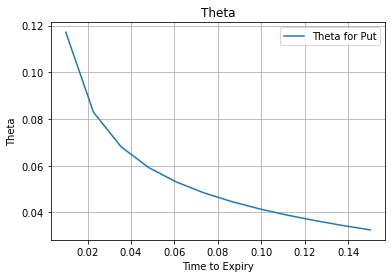

In [785]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

#### 4. Speed

In [786]:
def speed(S,E,T,r,vol):
    d1= (np.log(S/E)+(r+0.5*vol**2)*T)/(vol*np.sqrt(T))
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    speed_put= (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)/(vol**2*S**3*T))*(-2*d1+(1-(d1*d2))/(vol*np.sqrt(T)))
    return speed_put

In [787]:
speed(241.03, 236, 4/52, 0.0163,0.54261332)

7.628899943600119e-06

In [788]:
S = np.linspace(150,400,10)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],236, 4/52, 0.0163,0.54261332)

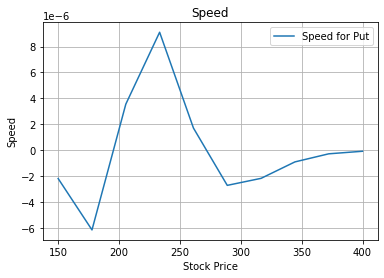

In [789]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

#### 5. Rho

In [790]:
def rho(S, E, T, r, vol):
    
    d1 = (np.log(S / E) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / E) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = - T * np.exp(-r * T) * (1-si.norm.cdf(d2,0.0,1.0)) -(si.norm.cdf(- np.sqrt(T)/ vol)* np.exp(-r * T) * (1-si.norm.pdf(d2,0.0,1.0))) 
    
    return rho

In [791]:
rho(241.03, 236, 4/52, 0.0163,0.54261332)

-0.2193652873737758

In [792]:
r = np.linspace(0,0.05,10)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(241.03, 236, 4/52, r[i],0.54261332)

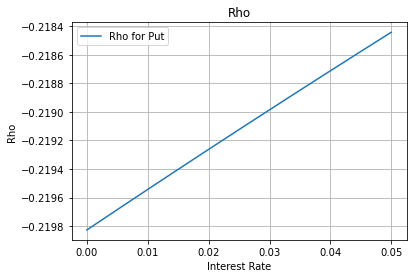

In [793]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend([ 'Rho for Put'])